# CITS 4012 Natural Language Processing
# Project 1: A rule based chatbox
#### 22889911 Zheyu Zhang

## 1. Data Exploration

All the library or packages needed are imported here together.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Doc, Span, Token
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import operator
import random
nlp = spacy.load("en_core_web_sm")


### Input Data

This is to read the data, and display the first five rows.

In [6]:
aujob = pd.read_csv('seek_australia.csv')
aujob.head(5)

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


This is for remove the character that are not standard english or digits.
This step is useful for the next operation.

In [7]:
for i in aujob.columns:
    aujob[i] = aujob[i].str.encode('ascii','ignore').str.decode('ascii')
aujob.head(5)

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Early starts and weekend shifts. No experienc...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


### 1.1 Frequency of Job Categories of Each City

Extract required information into a new dataframe, and display the number of cities, number of job categories and the job categories of each city.

In [8]:
city = aujob[["category","city"]]
aujob['category'].groupby(aujob['city']).nunique()

city
ACT                                    30
Adelaide                               29
Adelaide Hills & Barossa               15
Albany & Great Southern                 9
Albury Wodonga & Murray                18
                                       ..
Wagga Wagga & Riverina                 20
Whyalla & Eyre Peninsula               14
Wollongong, Illawarra & South Coast    25
Yarra Valley & High Country            15
Yorke Peninsula & Clare Valley         14
Name: category, Length: 65, dtype: int64

In [9]:
aujob.groupby('city')['category'].unique()

city
ACT                                    [Real Estate & Property, Administration & Offi...
Adelaide                               [Trades & Services, Retail & Consumer Products...
Adelaide Hills & Barossa               [Farming, Animals & Conservation, Trades & Ser...
Albany & Great Southern                [Healthcare & Medical, Community Services & De...
Albury Wodonga & Murray                [Construction, Administration & Office Support...
                                                             ...                        
Wagga Wagga & Riverina                 [Community Services & Development, Healthcare ...
Whyalla & Eyre Peninsula               [Call Centre & Customer Service, Community Ser...
Wollongong, Illawarra & South Coast    [Trades & Services, Engineering, Hospitality &...
Yarra Valley & High Country            [Community Services & Development, Trades & Se...
Yorke Peninsula & Clare Valley         [Community Services & Development, Trades & Se...
Name: category, 

In [10]:
aujob.groupby('category')['city'].nunique()

category
Accounting                                49
Administration & Office Support           58
Advertising, Arts & Media                 21
Banking & Financial Services              36
CEO & General Management                  24
Call Centre & Customer Service            30
Community Services & Development          60
Construction                              49
Consulting & Strategy                     15
Design & Architecture                     19
Education & Training                      52
Engineering                               47
Farming, Animals & Conservation           36
Government & Defence                      60
Healthcare & Medical                      64
Hospitality & Tourism                     58
Human Resources & Recruitment             33
Information & Communication Technology    35
Insurance & Superannuation                16
Legal                                     27
Manufacturing, Transport & Logistics      56
Marketing & Communications                24
M

This is the function for display the job categories in one city. 

It can display different city's distribution of job categories only by change the argument of `city_job(cityname)`.

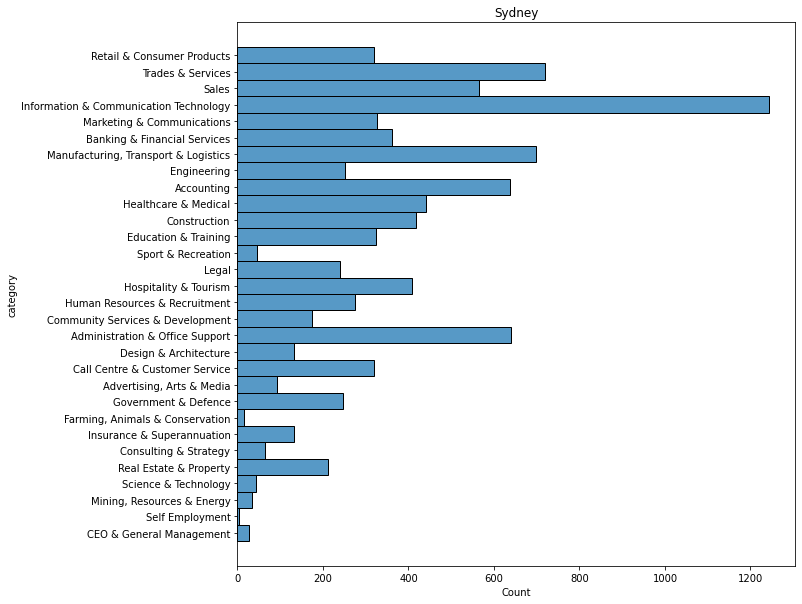

In [11]:
def city_job(cityname):
    plt.figure(figsize=(10,10))
    plt.title(cityname)
    plt.text
    df=aujob[aujob['city'] == cityname]
    sns.histplot(y="category", data=df, )
    plt.show()
    
city_job('Sydney')

### 1.2 Word Frequency of Each Job Category

This is for display the word frequency in the job description in each job category.

The gensim is one of the library that useful to tokenise while removing punctuation and turn the tokens into lower cases.

In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

The plot is displayed below, and it also can be changed to show different categories by changing the argument`word_frequency(category)`. 

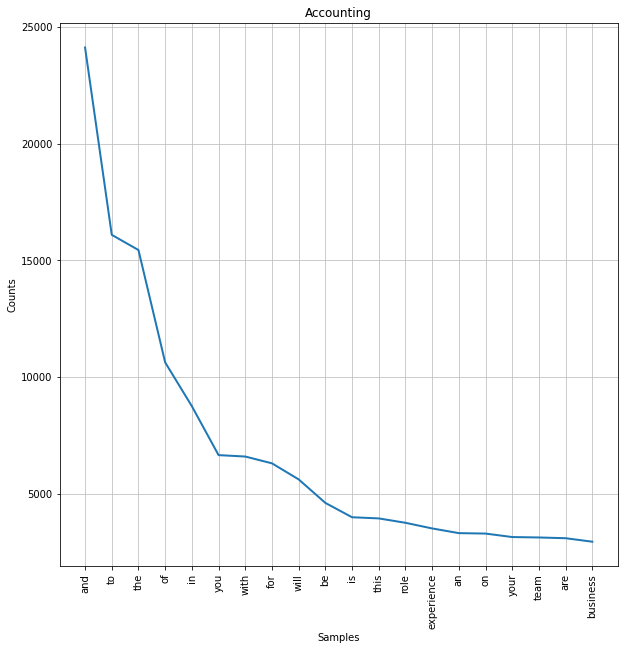

<AxesSubplot:title={'center':'Accounting'}, xlabel='Samples', ylabel='Counts'>

In [13]:
def word_frequency(category):
    des=[]
    df = aujob[aujob['category'] == category]
    tokenized = list(sent_to_words(df['job_description']))
    for i in tokenized:
        des += i
    b =  ' '.join(des)
    fdist = FreqDist(nltk.word_tokenize(b))
    plt.figure(figsize=(10,10))
    plt.title(category)
    return fdist.plot(20)
    
word_frequency("Accounting")

## 2 Data Preprocessing

### 2.1 Tokenize

In [14]:
def tokenize(category):
    df_cate = aujob[aujob['category'] == category]
    job_token=df_cate['job_description'].tolist()
    total=[]
    voc_size = 0
    text_size = 0
    overall = []
    for i in range(len(job_token)):
        words = nltk.wordpunct_tokenize(str(job_token[i]))
        total.append(words)
    for lst in total:
        overall += lst
    text_size = len(overall)
    voc_size = len(set(overall))
    size=(text_size,voc_size)
    return size, total, df_cate

#### Choose the Category you want to see here.

In [15]:
size_tokenized,tokenized,used_df = tokenize('Self Employment') 
print("Text Size vs. Vocabulary Size (Tokenized):",size_tokenized)

Text Size vs. Vocabulary Size (Tokenized): (4584, 1092)


### 2.2 Lemmatize and Compare with Stemming

In [16]:
def Lemm(tokenized_list):
    total=[]
    overall = []
    voc_size = 0
    text_size = 0
    lem = WordNetLemmatizer()  
    for lst in tokenized_list:
        lemmatized = []
        for w in lst:
            rootWord = lem.lemmatize(str(w))
            lemmatized.append(rootWord)
        total.append(lemmatized)
    for lst in total:
        overall += lst
    text_size = len(overall)
    voc_size = len(set(overall))
    size=(text_size,voc_size)
    return size, total


In [17]:
def Stem(tokenized_list):
    total = []
    overall = []
    voc_size = 0
    text_size = 0
    ps = PorterStemmer()
    for lst in tokenized_list:
        stemming = []
        for w in lst:  
            rootWord = ps.stem(str(w))
            stemming.append(rootWord)
        #voc_size += len(set(stemming))
        #text_size += len(stemming)
        total.append(stemming)
    for lst in total:
        overall += lst
    text_size = len(overall)
    voc_size = len(set(overall))
    size=(text_size,voc_size)
    return size,total

In [18]:
def LemAndStem(tokenized_list):
    size_lem, lemmatized = Lemm(tokenized)
    size_ste, stemming = Stem(tokenized)
    print('Text Size vs. Vocabulary Size (Lemmatized):', size_lem)
    print('Text Size vs. Vocabulary Size (Stemming):', size_ste)
    if size_lem[1] > size_ste[1]:
        print("Lemmatisation gets more words than Stemming")
        return stemming
    else:
        print("Stemming gets more words than Lemmatisation")
        return lemmatized
        
    
compared = LemAndStem(tokenized)

Text Size vs. Vocabulary Size (Lemmatized): (4584, 1051)
Text Size vs. Vocabulary Size (Stemming): (4584, 833)
Lemmatisation gets more words than Stemming


### 2.3 Retokenize Frequent Noun Phrases

In [19]:
def retokenize(compared_list):
    total = []
    overall = []
    nlp=spacy.load('en_core_web_sm')
    for i in range(len(compared_list)):
        sen_retoken = []
        lst = compared_list[i]
        sentence = ""
        for j in lst:
            sentence += j + " "
        doc = nlp(sentence)
        with doc.retokenize() as retokenizer:
            for chunk in doc.noun_chunks:
                retokenizer.merge(chunk)
        for token in doc:
            sen_retoken.append(token.text)
        total.append(sen_retoken)
    for l in total:
        overall += l
    text_size = len(overall)
    voc_size = len(set(overall))
    size=(text_size,voc_size)
    return size, total
size_ret, retokenized = retokenize(compared)
print("Text Size vs. Vocabulary Size (Retokenized):",size_ret)

Text Size vs. Vocabulary Size (Retokenized): (3241, 876)


### 2.4 Remove Stop Words

In [20]:
def removed(retokenized_list):
  overall_stop = []
  overall_lst = []
  stopword_count = []
  total = []
  overall = []
  nltk.download('stopwords')
  for i in range(len(retokenized_list)):
    lst = retokenized_list[i]
    lst_sentence = ""
    for j in lst:
      lst_sentence += j + " "
    overall_lst.append(lst_sentence)
  doc_tokenized = list(sent_to_words(overall_lst))
  dictionary = Dictionary()
  BoW_corpus = [dictionary.doc2bow(doc, allow_update= True) for doc in doc_tokenized]
  tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
  for doc in tfidf[BoW_corpus]:
      token_lst = []
      for id ,freq in doc:
          token_lst.append([dictionary[id], np.around(freq,decimals =8)])
          token_lst.sort(key = lambda x:x[1]) 
          stopword = [x for x,y in token_lst[:15]] # each for top 15 tfidf smallest 
      overall_stop.append(stopword)
  for word in overall_stop:
    stopword_count.append(word[0])
  top10tfidf = pd.value_counts(stopword_count)
  top10_list = top10tfidf.index.tolist()[:10] # Get the top 10 of intersection of each sentence
  stwo_in_official = [word for word in top10_list if word in stopwords.words()]
  # Compare the stop words found with the official stopwords, find the cross words and remove them.
  for p in range(len(retokenized_list)):
    new_list = [word for word in retokenized_list[p] if not word in stwo_in_official]
    total.append(new_list)
  for l in total:
        overall += l
  text_size = len(overall)
  voc_size = len(set(overall))
  size=(text_size,voc_size)
  return size, total
size_removed, SWord_Removed = removed(retokenized)
print("Text Size vs. Vocabulary Size (Removed Stop Words):",size_removed)

Text Size vs. Vocabulary Size (Removed Stop Words): (3000, 871)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.5 Group Job Description

Merge Noun Phrases and rank the tfidf, find the top 150 noun phrases and pick them into job experience.

In [21]:
def tfidfrank(stword_removed):
    total = []
    overall = []
    exper = []
    for i in range(len(stword_removed)):
        noun_lst = []
        each_lst = stword_removed[i]
        turn_sentence = ""
        for j in each_lst:
            if j.isalnum():
                turn_sentence += j + " "
            else:
                turn_sentence = turn_sentence
        doc = nlp(turn_sentence)  
        with doc.retokenize() as retokenizer:
            for chunk in doc.noun_chunks:
                retokenizer.merge(chunk)
        for token in doc:
            noun_lst.append(token.text)
        total.append(noun_lst)
    dictionary = Dictionary()
    BoW_corpus = [dictionary.doc2bow(doc, allow_update= True) for doc in total]
    tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
    for doc in tfidf[BoW_corpus]:
        token_lst = []
        for id ,freq in doc:
          token_lst.append([dictionary[id], np.around(freq,decimals =8)])
          token_lst.sort(key = lambda x:x[1], reverse = True) 
          noun = [x for x,y in token_lst[:150]]
        n=len(noun)
        for x in range(n):
            n -= 1
            if operator.contains(noun[x],"exper"):
                exper.append(noun[x])
                break
            elif n ==0 :
                exper.append("Not Required")
                break
    for l in total:
        overall += l
    text_size = len(overall)
    voc_size = len(set(overall))
    size=(text_size,voc_size)
    return size, total, exper
size_expext, Expext, new_experience = tfidfrank(SWord_Removed)
print("Text Size vs. Vocabulary Size (Experience extracted):",size_expext)
    

Text Size vs. Vocabulary Size (Experience extracted): (1659, 412)


Get a new dataframe that only contains what we need for the chatbot implementation.

In [23]:
total_df = pd.DataFrame()
category_lst = np.unique(aujob['category'].tolist())
for i in range(len(category_lst)):
    size_a,tokenized, whole_df = tokenize(category_lst[i])
    compared = LemAndStem(tokenized)
    size_b, retokenized = retokenize(compared)
    size_c, SWord_Removed = removed(retokenized)
    size_d, Expext, new_experience = tfidfrank(SWord_Removed)
    new_dataframe = whole_df
    newcol=[]
    dete=[]
    for row in SWord_Removed:
        new_lin = ""
        n = len(row)
        for word in row:
            n -= 1
            if operator.contains(word, 'experi'):
                dete.append("Yes")
                break
            elif n ==0 :
                dete.append("No")
                break

    for num in range(len(SWord_Removed)):
        if dete[num] == "Yes":
            x=len(SWord_Removed[num])
            for di in SWord_Removed[num]:
                x -= 1
                if di.isdigit():
                    newcol.append(di)
                    break
                elif x == 0:
                    newcol.append("No")
        else:
            newcol.append("No")
            continue
    new_dataframe['experienceyear'] = newcol
    new_dataframe['job_description'] = new_experience
    total_df = pd.concat([total_df, new_dataframe])
total_df

Text Size vs. Vocabulary Size (Lemmatized): (536106, 14667)
Text Size vs. Vocabulary Size (Stemming): (536106, 9103)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\envs\cits4012_py37\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\envs\cits4012_py37\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text Size vs. Vocabulary Size (Lemmatized): (563016, 17774)
Text Size vs. Vocabulary Size (Stemming): (563016, 11091)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (57264, 5462)
Text Size vs. Vocabulary Size (Stemming): (57264, 3475)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (261488, 9683)
Text Size vs. Vocabulary Size (Stemming): (261488, 5675)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (37341, 4415)
Text Size vs. Vocabulary Size (Stemming): (37341, 2800)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (248074, 10638)
Text Size vs. Vocabulary Size (Stemming): (248074, 6327)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (404741, 11728)
Text Size vs. Vocabulary Size (Stemming): (404741, 7469)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (364550, 13948)
Text Size vs. Vocabulary Size (Stemming): (364550, 8484)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (76648, 5637)
Text Size vs. Vocabulary Size (Stemming): (76648, 3414)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (94488, 6580)
Text Size vs. Vocabulary Size (Stemming): (94488, 4077)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (614725, 16448)
Text Size vs. Vocabulary Size (Stemming): (614725, 10491)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (303095, 12596)
Text Size vs. Vocabulary Size (Stemming): (303095, 7681)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (33326, 4576)
Text Size vs. Vocabulary Size (Stemming): (33326, 2935)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (600584, 15016)
Text Size vs. Vocabulary Size (Stemming): (600584, 9528)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (831824, 21532)
Text Size vs. Vocabulary Size (Stemming): (831824, 14357)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (355162, 14632)
Text Size vs. Vocabulary Size (Stemming): (355162, 9173)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (273425, 10637)
Text Size vs. Vocabulary Size (Stemming): (273425, 6460)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (968805, 23200)
Text Size vs. Vocabulary Size (Stemming): (968805, 14547)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (91579, 5266)
Text Size vs. Vocabulary Size (Stemming): (91579, 3092)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (167510, 8452)
Text Size vs. Vocabulary Size (Stemming): (167510, 5360)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (574406, 18911)
Text Size vs. Vocabulary Size (Stemming): (574406, 11678)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (281720, 11796)
Text Size vs. Vocabulary Size (Stemming): (281720, 7103)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (293906, 11402)
Text Size vs. Vocabulary Size (Stemming): (293906, 6908)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (180936, 8873)
Text Size vs. Vocabulary Size (Stemming): (180936, 5353)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (317464, 12002)
Text Size vs. Vocabulary Size (Stemming): (317464, 7376)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (516497, 16865)
Text Size vs. Vocabulary Size (Stemming): (516497, 10303)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (62669, 6093)
Text Size vs. Vocabulary Size (Stemming): (62669, 3795)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (4584, 1051)
Text Size vs. Vocabulary Size (Stemming): (4584, 833)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (50005, 4763)
Text Size vs. Vocabulary Size (Stemming): (50005, 3002)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text Size vs. Vocabulary Size (Lemmatized): (788515, 24417)
Text Size vs. Vocabulary Size (Stemming): (788515, 15753)
Lemmatisation gets more words than Stemming


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url,experience year
42,Accounting,Sydney,Hays Accountancy & Finance,AU,seek,experi,Insolvency Intermediate/Senior,Full Time,2018-04-16T01:33:59Z,NaN,"CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35991750,02
45,Accounting,Sydney,EML,AU,seek,practic financi contractu inventori function s...,Asset & Contracts Manager,Full Time,2018-04-16T04:00:02Z,NaN,NaN,https://www.seek.com.au/job/35993987,5
82,Accounting,Sydney,Robert Half Finance & Accounting,AU,seek,fund experi sap,Credit Officer,Contract/Temp,2018-04-16T02:41:24Z,$28 - $32 p.h.,Ryde & Macquarie Park,https://www.seek.com.au/job/35992747,No
92,Accounting,Brisbane,Hays Accountancy & Finance,AU,seek,Not Required,Finance Officer,Full Time,2018-04-16T03:12:55Z,NaN,Northern Suburbs,https://www.seek.com.au/job/35993171,07
123,Accounting,Melbourne,CFA,AU,seek,experi,Business Support Officer Accounts Receivable,Full Time,2018-04-16T02:38:21Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35992698,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29972,Trades & Services,Yarra Valley & High Country,Hitech Steel,AU,seek,Not Required,boilermaker / sheet metal worker,Full Time,2018-04-11T04:21:08Z,"$50,000 - $69,999",NaN,https://www.seek.com.au/job/35958508,No
29976,Trades & Services,Melbourne,Silver Star Motors,AU,seek,one ha an excit opportun foran experienc autom...,Automotive Technician,Full Time,2018-04-11T05:13:26Z,NaN,Eastern Suburbs,https://www.seek.com.au/job/35959523,No
29983,Trades & Services,Brisbane,Hays Manufacturing & Operations,AU,seek,Not Required,Sheet Metal Worker,Contract/Temp,2018-04-11T03:39:07Z,NaN,Southern Suburbs & Logan,https://www.seek.com.au/job/35957691,No
29989,Trades & Services,Melbourne,Defence Force Recruiting Southern Region,AU,seek,experi,Infantry Soldier - Female Opportunity,Full Time,2018-04-11T02:28:13Z,NaN,Western Suburbs,https://www.seek.com.au/job/35956735,59


### 2.6 Create a csv Object

Create a object so we do not have to run the steps above to obtain the needed dataset.

In [ ]:
total_df.to_csv('dataset.csv',index=False)

## 3 Linguistic Patterns

Obtain the dataset we saved in the new object, so everytime we use may save many time.

In [3]:
data = pd.read_csv("dataset.csv")
data.rename(columns={'category':'job_category','city':'location','job_title':'job_name','url':'job_url'},inplace=True)
list = []
for i in data['experienceyear']:
    if i == 'No':
        i = -1
    elif float(i) > 15:
        i = -1
    else:
        i=i
    list.append(float(i))
data['experienceyear'] = list

Covert into dictionary

In [4]:
job_details = []
dict_title = ['job_category', 'job_name', 'job_type', 'location', 'company_name', 'experience', 'job_URL','experienceyear']
location = data['location'].tolist()
job_name = data['job_name'].tolist()
company_name = data['company_name'].tolist()
job_type = data['job_type'].tolist()
job_URL = data['job_url'].tolist()
job_category = data['job_category'].tolist()
experience = data['job_description'].tolist()
experienceyear = data['experienceyear'].tolist()
for i in range(len(job_name)):
    key = []
    key.append(job_category[i].lower())
    key.append(job_name[i].lower())
    key.append(job_type[i].lower())
    key.append(location[i].lower())
    key.append(company_name[i].lower())
    key.append(experience[i].lower())
    key.append(job_URL[i].lower())
    key.append(experienceyear[i])
    job_details.append(dict(zip(dict_title,key)))
dat = pd.DataFrame(job_details)

### 3.1 For Job category, job name

In [5]:
patternjn1 = [{"POS":"NOUN"},{"POS":"ADP"},{"POS":"PROPN"}] # Find me a job for Accountant in Sydney.
patternjn2 = [{"LEMMA":"experience"},{"POS":"ADP"},{"POS":"NOUN"}] # I have ten years of experience in taxation.
patternjn3 = [{"POS":"ADP"},{"POS":"DET"},{"LOWER":"company","OP":"!"}] #I have no exprience, find me a job in a bakery.
matcherjob_name = Matcher(nlp.vocab)
matcherjob_name.add("Job_name",[patternjn1,patternjn2,patternjn3])
# doc = nlp('I have no exprience, find me a job in a bakery.')
# matches = matcherjob_name(doc)
# for match_id, start, end in matches:
#     span = doc[start:end]
#     print("Span:",span.text)
#     print("The positions in the doc are:", start, "-", end)

Span: in a bakery
The positions in the doc are: 9 - 12


###  3.2 For Location

In [6]:
patternloc1 = [{"TEXT":"in"},{"POS":"PROPN"}] # in Sydney
patternloc2 = [{"TEXT":"on"},{"POS":"PROPN"}] # on... Road
patternloc3 = [{"POS":"ADP"},{"ENT_TYPE":"GPE","OP":"+"}] # in Melbourne
patternloc4 = [{"TEXT":"on"},{"POS":"DET","OP":"?"},{"POS":"PROPN"},{"OP":"+"},{"LOWER":"road"}] # Find me a job for working on the Geelong & Great Ocean Road.
patternloc5 = [{"POS":"ADP"},{"ENT_TYPE":"LOC","OP":"+"}] # Find me a job for working on Sunshine Coast.
matcherloc = Matcher(nlp.vocab)
matcherloc.add("Location",[patternloc1, patternloc2, patternloc3, patternloc4, patternloc5])
# doc = nlp(u"Find me a job for accountant in Sydney.")
# matches = matcherloc(doc)
# for match_id, start, end in matches:
#     span = doc[start:end]
#     print("Span:",span.text)
#     print("The positions in the doc are:", start, "-", end)

### 3.3 For Company

In [7]:
patternco1 = [{"LOWER":"company"},{"POS":"VERB"},{"ENT_TYPE":"ORG","OP":"+"},{"DEP":"oprd"}] # Find me a job working for the company called Sharp & Carter Accounting Clerical
patternco2 = [{"POS":"VERB"},{"POS":"ADP"},{"OP":"*"},{"DEP":"pobj"}] # "I hope that Sharp & Carter Accounting Clerical would hire me.
matcherco_name = Matcher(nlp.vocab)
matcherco_name.add("CompanyName",[patternco1, patternco2])
# doc = nlp(u"I have no exprience, find me a job in Taxation.")
# matches = matcherco_name(doc)
# for match_id, start, end in matches:
#     span = doc[start:end]
#     print("Span:",span.text)
#     print("The positions in the doc are:", start, "-", end)

In [8]:
# nltk.download('averaged_perceptron_tagger')
# nlp = spacy.load("en_core_web_sm")
# doc = nlp(u"I have no exprience, find me a job in taxation.")
# displacy.render(doc,style = 'dep')


### 3.4 For Job Type

In [9]:
patternty1 = [{"DEP":"det"},{"DEP":"amod"},{"DEP":"compound","OP":"?"}] # I want a temporary job.
patternty2 = [{"DEP":"relcl"},{"POS":"ADJ"},{"POS":"NOUN","OP":"?"}] # I want a job which is full time.
matcherjob_type = Matcher(nlp.vocab)
matcherjob_type.add("JobType",[patternty1, patternty2])

### 3.5 For Experience

In [10]:
patternexp1 = [{"POS":"VERB"},{"DEP":"nummod"},{"DEP":"dobj"},{"DEP":"prep"},{"LEMMA":"experience"}]# ten years of experience
patternexp2 = [{"POS":"VERB"},{"POS":"NUM"},{"OP":"*"},{"LEMMA":"experience"}] # ten years experience of taxation
patternexp3 = [{"POS":"ADP"},{"POS":"DET"},{"LEMMA":"experience"}]# with no experience
patternexp4 = [{"POS":"VERB"},{"POS":"DET"},{"LEMMA":"experience"}]# I have no experience, find me a job in a bakery.
matcherexp = Matcher(nlp.vocab)
matcherexp.add("Experience",[patternexp1,patternexp2,patternexp3,patternexp4])
# doc = nlp(u"Find me a job in Sydney.")
# matches = matcherexp(doc)
# for match_id, start, end in matches:
#     span = doc[start:end]
#     print("Span:",span.text)
#     print("The positions in the doc are:", start, "-", end)

In [11]:
# nltk.download('averaged_perceptron_tagger')
# nlp = spacy.load("en_core_web_sm")
# doc = nlp(u"I have no experience, find me a job in a bakery.")
# displacy.render(doc,style = 'dep')
# # for token in doc:
# #     print(token.head.text, token.dep_, token.text)
# for ent in doc.ents:
#     print(ent.text, ent.label_)

## 4 Chatbot Implementation and Deployment

### 4.1 Extract intents of job name

In [12]:
def job_name_extr(sentence):
    doc = nlp(sentence)
    match = matcherjob_name(doc,as_spans = True)
    return match[0][-1]
job_name_extr('I have ten years of experience in taxation, find me a job')

taxation

### 4.2 Extract intents of location

In [13]:
def location_extr(sentence):
    doc = nlp(sentence)
    match = matcherloc(doc,as_spans=True)
    return match[-1][1:]
location_extr('I want to work in Adelaide.')

Adelaide

### 4.3 Extract intents of company name

In [14]:
def company_name_extr(sentence):
    doc = nlp(sentence)
    match = matcherco_name(doc,as_spans=True)
    return match[-1][2:]
company_name_extr('I want to work for Sharp & Carter Accounting Clerical')

Sharp & Carter Accounting Clerical

### 4.4 Extract intents of job type

In [15]:
def job_type_extr(sentence):
    doc = nlp(sentence)
    match = matcherjob_type(doc,as_spans=True)
    return match[-1][1:]
job_type_extr("I want a job which is temporary.")

temporary

### 4.5 Extract intents of experience

In [16]:
def experienceyear_extr(sentence):
    doc = nlp(sentence)
    match = matcherexp(doc,as_spans=True)
    phrase = match[0][1:]
    year_dic = {"no":0,"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10,"eleven":11,"twelve":12}
    return year_dic[str(phrase[0]).lower()]
experienceyear_extr("I have no experience in taxation, find me a job")

0

### 4.6 The main function to extract every types of intent

This main function would return a dictionary that contains the information the user gives.

In [20]:
def extra_elements(input_text):
    NameLst = ['job_name', 'location', 'company_name', 'job_type', 'experienceyear']
    matchname = [matcherjob_name,matcherloc,matcherco_name,matcherjob_type, matcherexp]
    useful_info = []
    n=len(NameLst)
    doc_extra = nlp(input_text)
    for i in range(n):
        match_ele = matchname[i](doc_extra,as_spans=True)
        if match_ele != []:
            val = "".join([NameLst[i],'_extr'])
            info = str(eval(val)(input_text))
            if info.isdigit():
                useful_info.append(info)
            else:
                useful_info.append(info.lower())
        else:
            useful_info.append("Empty")
    match_dic = dict(zip(NameLst,useful_info))
    return match_dic
extra_elements('I have no experience, find me a job in a bakery.')


{'job_name': 'bakery',
 'location': 'Empty',
 'company_name': 'Empty',
 'job_type': 'Empty',
 'experienceyear': '0'}

### 4.7 Chatbot Implementation

Bot name:'Jarvis'

Token: '5120317463:AAFMSX7wgP_OtDpTmX8MPQQKhe1RuVq7S38'

In [18]:
import telegram
TOKEN = '5120317463:AAFMSX7wgP_OtDpTmX8MPQQKhe1RuVq7S38'
bot = telegram.Bot(token=TOKEN)
print(bot.get_me())

{'supports_inline_queries': False, 'is_bot': True, 'can_read_all_group_messages': False, 'username': 'NadleehBot', 'id': 5120317463, 'first_name': 'Jarvis', 'can_join_groups': True}


In [21]:
from telegram.ext import Updater, MessageHandler, Filters


def botreply(update, context):
    job_message = update.message.text  
    update.message.reply_text('Please wait, looking for a suitable information now...')
    info_dic = extra_elements(job_message)
    search_lst = dat
    NameLst = ['job_name', 'location', 'company_name', 'job_type','experienceyear']
    info_dic = extra_elements(job_message)
    for i in NameLst:
        if info_dic[i] != 'Empty':
            if i == 'experienceyear':
                search_lst = search_lst[search_lst[i] < int(info_dic[i])]
            else:
                search_lst = search_lst[search_lst[i].str.contains(info_dic[i])]
        else:
            continue
    if len(search_lst) >= 500:
        update.message.reply_text('Your conditions are too broad, there are too many choices, maybe you can give some more conditions')
        update.message.reply_text('Do you want to give some more information about the job you seek?')
    elif len(search_lst) == 0:
        update.message.reply_text('Such conditions are too harsh, unable to find a suitable job, maybe you can loose some conditions')
            
    elif len(search_lst) < 500 and len(search_lst) > 0:
        x = random.randint(0,int(1/len(search_lst)))-1
        name = search_lst.iloc[x]['job_name']
        type = search_lst.iloc[x]['job_type']
        loc = search_lst.iloc[x]['location'].title()
        co = search_lst.iloc[x]['company_name'].title()
        exp = search_lst.iloc[x]['experienceyear']
        web = search_lst.iloc[x]['job_URL']
        if exp <= 0:
            exp = "no"
        else:
            exp = str(int(exp))+" years of"
        update.message.reply_text('I have found a job that is suitable for you. The following is the details.')
        update.message.reply_text('The job requies %s' %str(exp)+' experience. For being a %s'%str(name)+', which is a %s'%str(type)+' job.')
        update.message.reply_text('This job is posted by a company called %s'%str(co)+', and it is located in %s'%str(loc)+'. If you want more information, you can go %s'%str(web)+'.')
    else:
        update.message.reply_text('There is something wrong with your input, I highly recommend to send me you conditions again, but be more specific. Thank you!')
    


    update.message.reply_text('Thanks for using our service, if you have further questions, just let me know.')   
    update.message.reply_text('Wish you have a good day! BYE!')



#the code responsible for interactions with Telegram
updater = Updater(TOKEN, use_context=True)
updater.dispatcher.add_handler(MessageHandler(Filters.text, botreply))
updater.start_polling()
updater.idle()   
